In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ucl-202122-uefa-champions-league/defending.csv
/kaggle/input/ucl-202122-uefa-champions-league/key_stats.csv
/kaggle/input/ucl-202122-uefa-champions-league/attacking.csv
/kaggle/input/ucl-202122-uefa-champions-league/goalkeeping.csv
/kaggle/input/ucl-202122-uefa-champions-league/disciplinary.csv
/kaggle/input/ucl-202122-uefa-champions-league/goals.csv
/kaggle/input/ucl-202122-uefa-champions-league/attempts.csv
/kaggle/input/ucl-202122-uefa-champions-league/distributon.csv


In [2]:
df = pd.read_csv('/kaggle/input/ucl-202122-uefa-champions-league/disciplinary.csv')

In [3]:
df.head()

,serial,player_name,club,position,fouls_committed,fouls_suffered,red,yellow,minutes_played,match_played
0,1,João Palhinha,Sporting CP,Midfielder,23,17,2,0,534,6
1,2,Capoue,Villarreal,Midfielder,19,17,3,1,1046,12
2,2,Rodri,Man. City,Midfielder,19,4,2,0,842,10
3,2,Seiwald,Salzburg,Midfielder,19,3,2,0,649,8
4,5,Balanta,Club Brugge,Midfielder,18,3,4,0,407,5


In [4]:
df.shape

(584, 10)

In [5]:
df.describe()

,serial,fouls_committed,fouls_suffered,red,yellow,minutes_played,match_played
count,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000
mean,261.876712,4.960616,4.525685,0.842466,0.042808,374.214041,5.690068
std,154.692375,3.774995,4.247815,0.933011,0.210895,230.626235,2.467248
min,1.000000,1.000000,0.000000,0.000000,0.000000,4.000000,1.000000
25%,146.000000,2.000000,1.000000,0.000000,0.000000,193.500000,4.000000
50%,263.000000,4.000000,3.000000,1.000000,0.000000,349.500000,5.500000
75%,417.000000,6.000000,7.000000,1.000000,0.000000,520.750000,7.000000
max,491.000000,23.000000,24.000000,4.000000,2.000000,1199.000000,13.000000


In [6]:
df.describe(include = 'all')

,serial,player_name,club,position,fouls_committed,fouls_suffered,red,yellow,minutes_played,match_played
count,584.000000,584,584,584,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000
unique,NaN,574,32,4,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Peña,Liverpool,Midfielder,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,2,23,234,NaN,NaN,NaN,NaN,NaN,NaN
mean,261.876712,NaN,NaN,NaN,4.960616,4.525685,0.842466,0.042808,374.214041,5.690068
std,154.692375,NaN,NaN,NaN,3.774995,4.247815,0.933011,0.210895,230.626235,2.467248
min,1.000000,NaN,NaN,NaN,1.000000,0.000000,0.000000,0.000000,4.000000,1.000000
25%,146.000000,NaN,NaN,NaN,2.000000,1.000000,0.000000,0.000000,193.500000,4.000000
50%,263.000000,NaN,NaN,NaN,4.000000,3.000000,1.000000,0.000000,349.500000,5.500000
75%,417.000000,NaN,NaN,NaN,6.000000,7.000000,1.000000,0.000000,520.750000,7.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   serial           584 non-null    int64 
 1   player_name      584 non-null    object
 2   club             584 non-null    object
 3   position         584 non-null    object
 4   fouls_committed  584 non-null    int64 
 5   fouls_suffered   584 non-null    int64 
 6   red              584 non-null    int64 
 7   yellow           584 non-null    int64 
 8   minutes_played   584 non-null    int64 
 9   match_played     584 non-null    int64 
dtypes: int64(7), object(3)
memory usage: 45.8+ KB


In [8]:
df.nunique()

serial              20
player_name        574
club                32
position             4
fouls_committed     20
fouls_suffered      23
red                  5
yellow               3
minutes_played     387
match_played        13
dtype: int64

# Checking for NULL Values

In [9]:
total_null = df.isnull().sum().sort_values(ascending = False)
percent = ((df.isnull().sum()/df.isnull().count())*100).sort_values(ascending = False)
print("Total records = ", df.shape[0])

missing_data = pd.concat([total_null,percent.round(2)],axis=1,keys=['Total Missing','In Percent'])
missing_data.head(10)

Total records =  584


,Total Missing,In Percent
serial,0,0.0
player_name,0,0.0
club,0,0.0
position,0,0.0
fouls_committed,0,0.0
fouls_suffered,0,0.0
red,0,0.0
yellow,0,0.0
minutes_played,0,0.0
match_played,0,0.0


**NO NULL VALUES PRESENT**
So we dont have to replace it

# Data Visulaization

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# FOULS COMMITTED

In [11]:
fouls_committed_count = df['fouls_committed'].value_counts()
fouls_committed_count

1     94
3     91
2     74
4     63
5     62
6     55
7     39
9     23
10    16
11    15
8     13
12     9
14     6
17     6
13     5
15     4
16     4
19     3
18     1
23     1
Name: fouls_committed, dtype: int64

In [12]:
fouls_committed_values = df['fouls_committed'].values
fouls_committed_values

array([23, 19, 19, 19, 18, 17, 17, 17, 17, 17, 17, 16, 16, 16, 16, 15, 15,
       15, 15, 14, 14, 14, 14, 14, 14, 13, 13, 13, 13, 13, 12, 12, 12, 12,
       12, 12, 12, 12, 12, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 11, 11, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,
        9,  9,  9,  9,  9,  9,  9,  9,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  7,  7,  7,  7,  7,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5

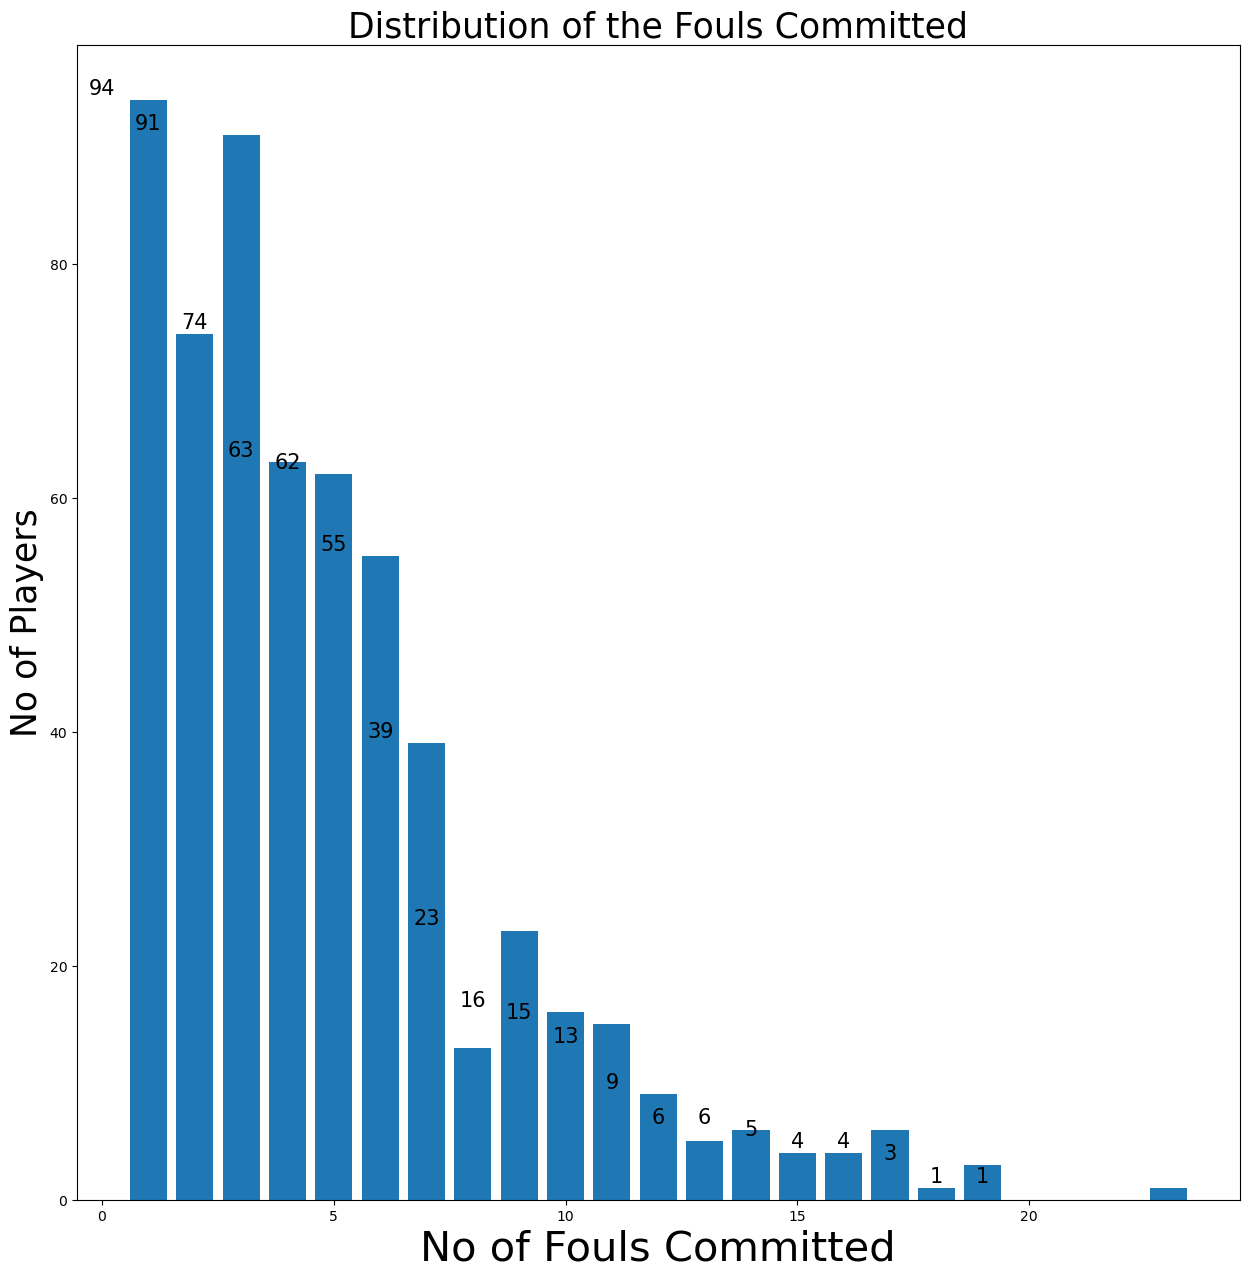

In [13]:

plt.figure(figsize=(15,15))
plt.bar( fouls_committed_count.index, fouls_committed_count.values,width =0.8)
plt.title('Distribution of the Fouls Committed', fontsize = 25)
# plt.xticks([0,1],['Not Survived','Survived'])
plt.ylabel('No of Players', fontsize = 25)
plt.xlabel('No of Fouls Committed',fontsize = 30)
for i, value in enumerate(fouls_committed_count.values):
    plt.text(i, value+1, str(value), fontsize=15, color='black', horizontalalignment='center',verticalalignment='center')

plt.show()

Text(0.5, 0, 'No of Fouls Committed')

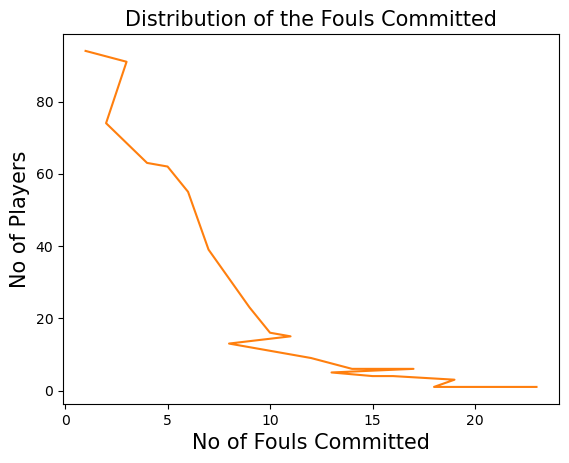

In [14]:
fig, ax = plt.subplots()
ax.plot(fouls_committed_count.index,fouls_committed_count.values,color='C1')
plt.title('Distribution of the Fouls Committed' , fontsize = 15)
plt.ylabel('No of Players',fontsize = 15)
plt.xlabel('No of Fouls Committed',fontsize = 15)


# FOULS SUFFERED

In [15]:
fouls_suffered_count = df['fouls_suffered'].value_counts()
fouls_suffered_count

2     83
0     79
3     73
1     70
4     63
6     41
7     32
8     28
5     26
11    18
9     17
10    13
13     9
17     6
12     6
14     5
18     4
15     4
16     2
20     2
24     1
23     1
19     1
Name: fouls_suffered, dtype: int64

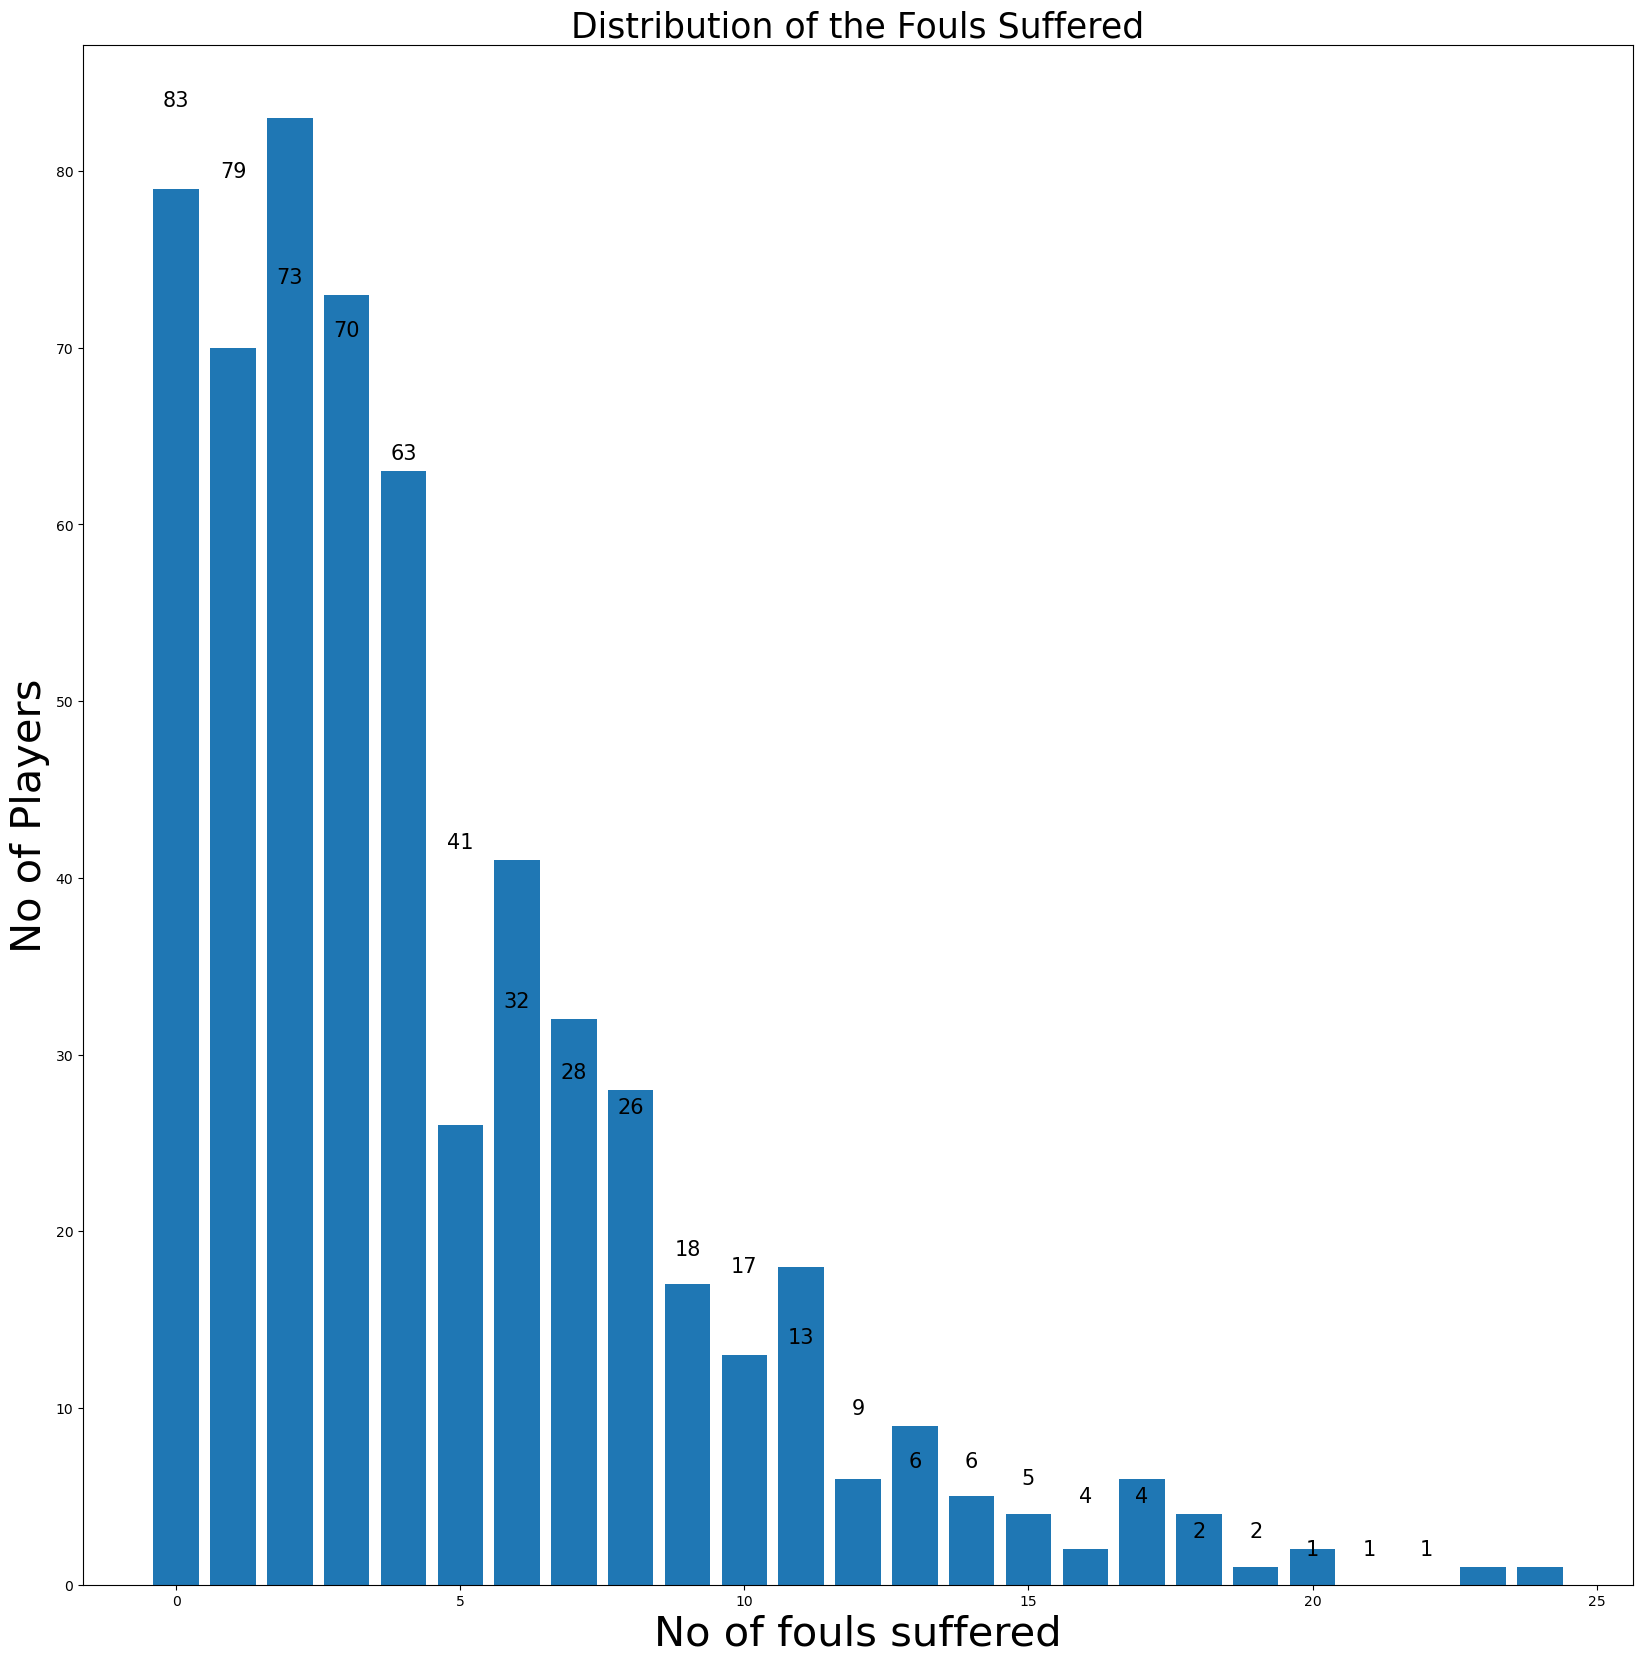

In [16]:
plt.figure(figsize=(20,20))
plt.bar(fouls_suffered_count.index, fouls_suffered_count.values)
plt.title('Distribution of the Fouls Suffered' , fontsize = 25)
# plt.xticks([0,1],['Not Survived','Survived'])
plt.ylabel('No of Players',fontsize = 30)
plt.xlabel('No of fouls suffered',fontsize =30)
for i, value in enumerate(fouls_suffered_count.values):
    plt.text(i, value+1, str(value), fontsize=15, color='black', horizontalalignment='center',verticalalignment='center')

plt.show()

Text(0.5, 0, 'No of Fouls Suffered')

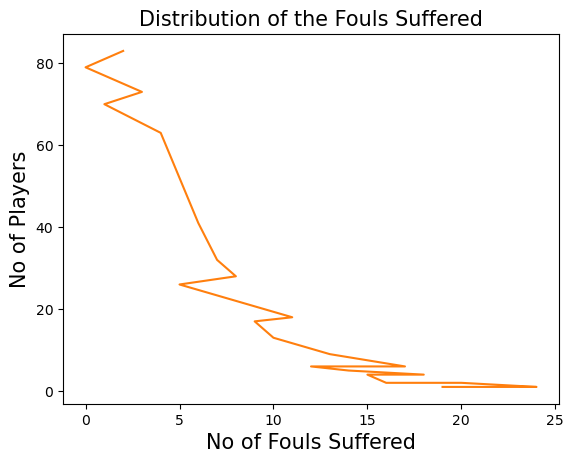

In [17]:
fig, ax = plt.subplots()
ax.plot(fouls_suffered_count.index,fouls_suffered_count.values,color='C1')
plt.title('Distribution of the Fouls Suffered' , fontsize = 15)
plt.ylabel('No of Players',fontsize = 15)
plt.xlabel('No of Fouls Suffered',fontsize = 15)

# Fouls Committed VS Fouls Suffered

Text(0.5, 0, 'No of Fouls Suffered / committed')

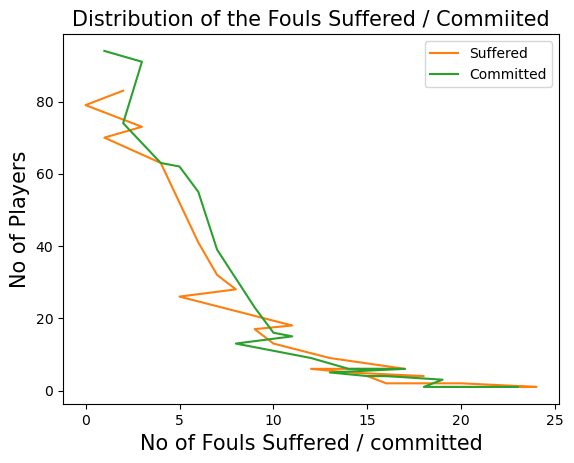

In [18]:
fig, ax = plt.subplots()
ax.plot(fouls_suffered_count.index,fouls_suffered_count.values,color='C1')
ax.plot(fouls_committed_count.index,fouls_committed_count.values,color='C2')
plt.legend(["Suffered","Committed"])

plt.title('Distribution of the Fouls Suffered / Commiited' , fontsize = 15)
plt.ylabel('No of Players',fontsize = 15)
plt.xlabel('No of Fouls Suffered / committed',fontsize = 15)


# RED COUNT


In [19]:
red_count = df['red'].value_counts()
red_count

0    257
1    206
2     83
3     32
4      6
Name: red, dtype: int64

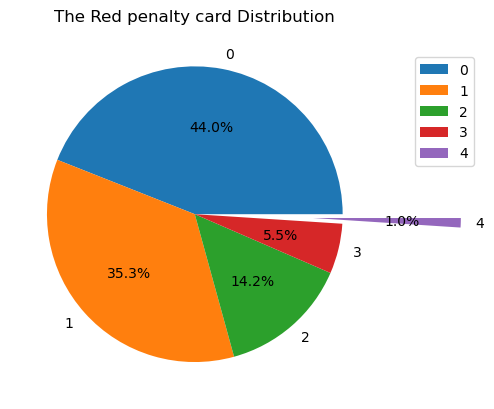

In [20]:
plt.pie(x=red_count.values ,labels=red_count.index,autopct = '%.1f%%' ,explode=[0,0,0,0,0.8])
plt.title('The Red penalty card Distribution')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=2)
plt.show();


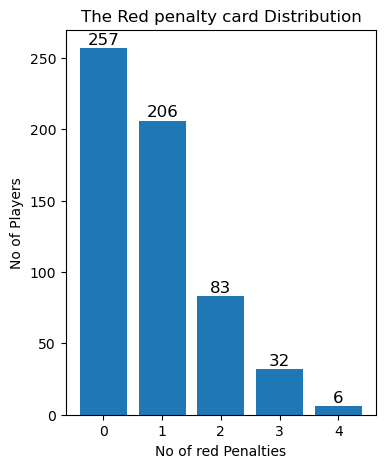

In [21]:
plt.figure(figsize=(4,5))
plt.bar(red_count.index, red_count.values)
plt.title('The Red penalty card Distribution')
plt.ylabel('No of Players')
plt.xlabel('No of red Penalties')
for i, value in enumerate(red_count.values):
    plt.text(i, value+6, str(value), fontsize=12, color='black', horizontalalignment='center',verticalalignment='center')
plt.show()

# YELLOW COUNT

In [22]:
yellow_count = df['yellow'].value_counts()

yellow_count


0    560
1     23
2      1
Name: yellow, dtype: int64

In [23]:
yellow_values = df['yellow'].values
yellow_values

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 2, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,

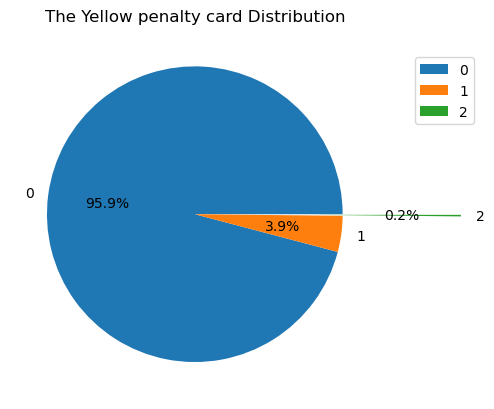

In [24]:
plt.pie(x=yellow_count.values ,labels=yellow_count.index,autopct = '%.1f%%' ,explode=[0,0,0.8])
plt.title('The Yellow penalty card Distribution')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=2)
plt.show();

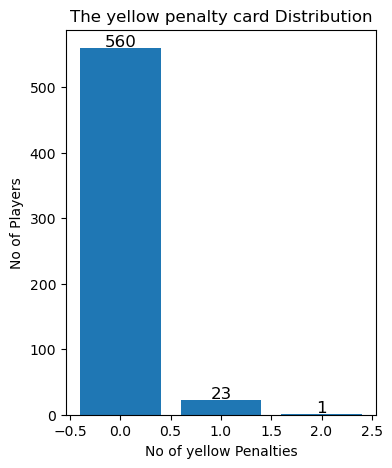

In [25]:
plt.figure(figsize=(4,5))
plt.bar(yellow_count.index, yellow_count.values)
plt.title('The yellow penalty card Distribution')
plt.ylabel('No of Players')
plt.xlabel('No of yellow Penalties')
for i, value in enumerate(yellow_count.values):
    plt.text(i, value+9, str(value), fontsize=12, color='black', horizontalalignment='center',verticalalignment='center')
plt.show()

# MINUTES PLAYED


In [26]:
minutes_played_count = df['minutes_played'].value_counts()
minutes_played_count

540    15
450    12
720     6
180     6
484     5
       ..
350     1
383     1
591     1
116     1
7       1
Name: minutes_played, Length: 387, dtype: int64

In [27]:
minutes_played_values = df['minutes_played'].values
minutes_played_values

array([ 534, 1046,  842,  649,  407,  914, 1076,  810,  703,  668,  558,
        822,  715,  908,  398,  816,  281,  487,  959,  672,  849,  581,
        478,  491,  720, 1199,  493,  700,  446,  716,  577,  672,  450,
        467,  273,  379,  211,  304,  427,  325,  876,  630,  666,  548,
        500,  496,  578,  572,  405,  840,  840,  720,  778,  429,  532,
        540,  401,  531,  400,  570,  398,  409,  878,  538,  660,  810,
        327,  666,  231,  484,  607,  461,  313,  487,  630,  734,  661,
        561,  484,  407,  891,  321, 1045,  494,  463,  320,  764,  352,
        679,  435, 1040,  425,  386,  503,  524,  704,  529,  322,  553,
        410,  530,  337,  630,  369,  393,  334,  902,  468,  354,  665,
        528,  587,  486,  460,  376,  205,  867,  431,  574,  720,  444,
        347,  464,  315,  397,  539,  312,  418,  420,  400,  603,  477,
        466,  442,  645,  328,  380,  573,  341,  472,  484,  444,  131,
        219,  225,  986,  632,  529,  405,  526,  3

In [28]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['minutes_played'] = le.fit_transform(df['minutes_played'].astype(float))

In [29]:
minutes_played_values_hist = np.histogram(minutes_played_values,bins=[0,50,100,150,200,250,300,350,400])

In [30]:
minutes_played_values_hist

(array([77, 73, 76, 78, 70, 82, 82, 46]),
 array([  0,  50, 100, 150, 200, 250, 300, 350, 400]))

In [31]:
minutes_played_values_hist_labels = ['0-50','51-100','101-150','151-200','201-250','251-300','301-350','351-400']

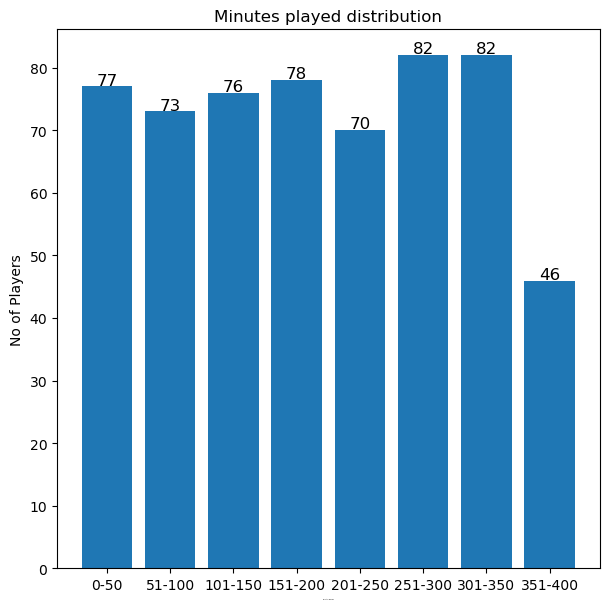

In [32]:
plt.figure(figsize=(7,7))
plt.title('Minutes played distribution')
plt.bar(minutes_played_values_hist_labels,minutes_played_values_hist[0])
plt.xlabel('Minutes Played',fontsize=0.2)

plt.ylabel('No of Players')

for i,value in enumerate(minutes_played_values_hist[0]):
     plt.text(i, value+1, str(value), fontsize=12, color='black', horizontalalignment='center',verticalalignment='center')
plt.show()

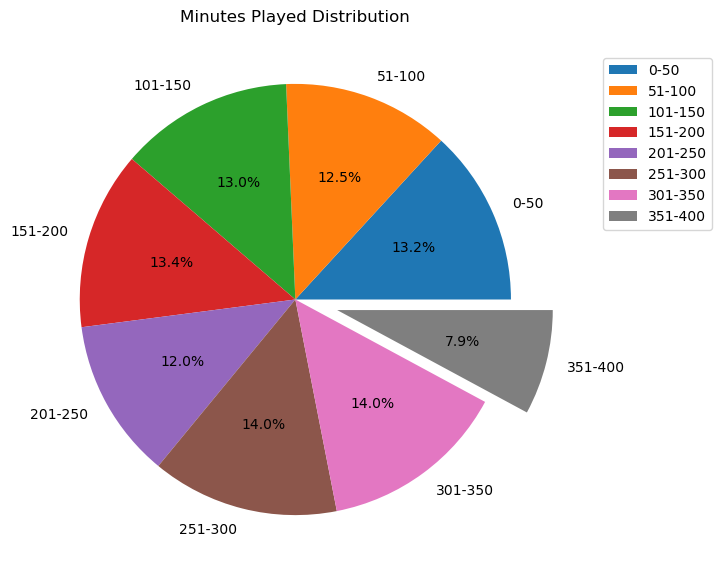

In [33]:
plt.figure(figsize=(7,7))
plt.title('Minutes Played Distribution')
plt.pie(minutes_played_values_hist[0],labels=minutes_played_values_hist_labels,autopct="%1.1f%%",explode=[0,0,0,0,0,0,0,0.2])
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=2)
plt.show()

minutes_played_values_hist_labels = [

# MATCH PLAYED

In [34]:
match_played_count = df['match_played'].value_counts()
match_played_count

6     118
5     110
4      80
8      55
7      48
3      48
2      37
9      24
10     22
1      17
12     11
11      8
13      6
Name: match_played, dtype: int64

In [35]:
match_played_values = df['match_played'].values
match_played_values

array([ 6, 12, 10,  8,  5, 11, 12,  9,  8,  8,  7, 13,  9, 13,  6, 10,  7,
       10, 11,  8, 13, 12, 10,  6,  8, 13,  8,  9,  9,  8,  9,  9,  6,  7,
        6,  5,  8,  5,  6,  6, 10,  7,  8,  8,  6,  6, 11,  8,  6,  9,  9,
        8, 10,  5,  6,  6, 10,  6,  7,  8,  5,  7, 11,  7,  8,  9,  6, 12,
        8,  6,  8,  7,  4,  6,  7, 10,  8,  8,  6,  5, 10,  5, 12,  6,  8,
        6, 10,  8,  9,  5, 12,  6,  6,  6,  6,  9,  7,  5,  7,  6,  6,  4,
        7,  7,  5,  6, 12,  6,  5,  9,  6,  8,  6,  6,  6,  4, 10,  7,  9,
        8,  6,  6,  6,  5,  5,  7,  6,  5,  5,  5,  8,  7,  6,  5, 10,  6,
        8,  7,  6,  7,  6,  5,  4,  5,  4, 12,  9,  7,  6,  6,  6,  6,  9,
        5,  6,  8, 10, 11,  6,  6,  6,  4,  8,  7,  9,  6,  6,  7,  6,  9,
        6,  6,  4,  7,  4,  7,  5,  5,  5,  4,  5,  5,  5,  4,  4,  9,  3,
        4,  4,  5,  4,  7,  6,  8,  8,  6,  5,  5,  5,  3,  8,  7,  9, 11,
        4,  5, 11,  8, 10, 10,  5,  8,  7,  7,  4,  6,  7,  6,  8, 10,  6,
        9,  6,  4,  8,  5

In [36]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['match_played'] = le.fit_transform(df['match_played'].astype(float))

In [37]:
match_played_values_hist = np.histogram(match_played_values,bins=[0,2,4,6,8,10,12,14])
match_played_values_hist


(array([ 54, 128, 228, 103,  46,  19,   6]),
 array([ 0,  2,  4,  6,  8, 10, 12, 14]))

In [38]:
match_played_values_hist_labels = ['0-2','3-4','5-6','7-8','9-10','11-12','13-14']


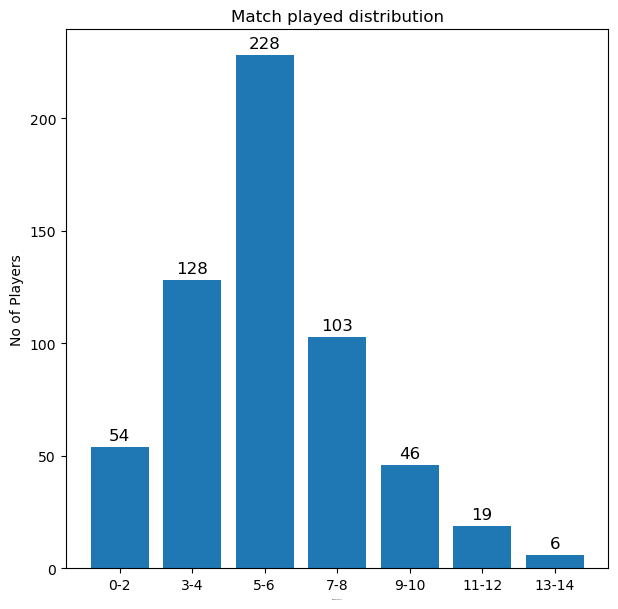

In [39]:
plt.figure(figsize=(7,7))
plt.title('Match played distribution')
plt.bar(match_played_values_hist_labels,match_played_values_hist[0])
plt.xlabel('Match Played',fontsize=0.2)
plt.ylabel('No of Players')
for i,value in enumerate(match_played_values_hist[0]):
     plt.text(i, value+5, str(value), fontsize=12, color='black', horizontalalignment='center',verticalalignment='center')
plt.show()


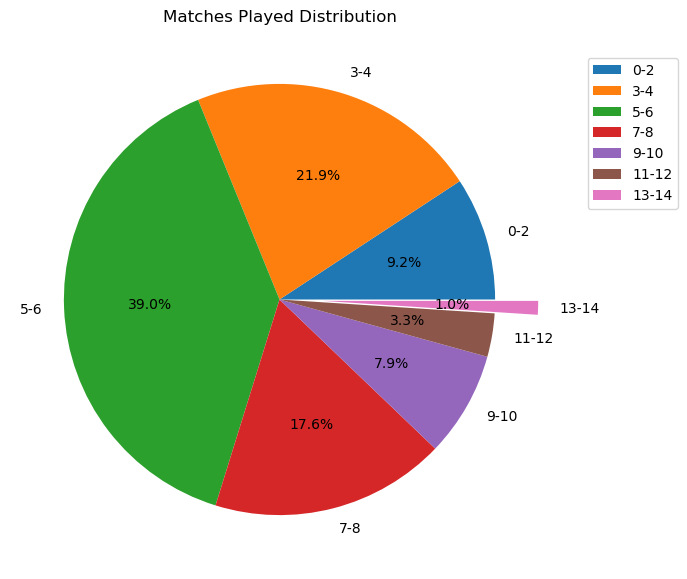

In [40]:
plt.figure(figsize=(7,7))
plt.title('Matches Played Distribution')
plt.pie(match_played_values_hist[0],labels=match_played_values_hist_labels,autopct="%1.1f%%",explode=[0,0,0,0,0,0,0.2])
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=2)
plt.show()

# CROSS ATTRIBUTES

**MATCH PLAYED VS RED CARD**

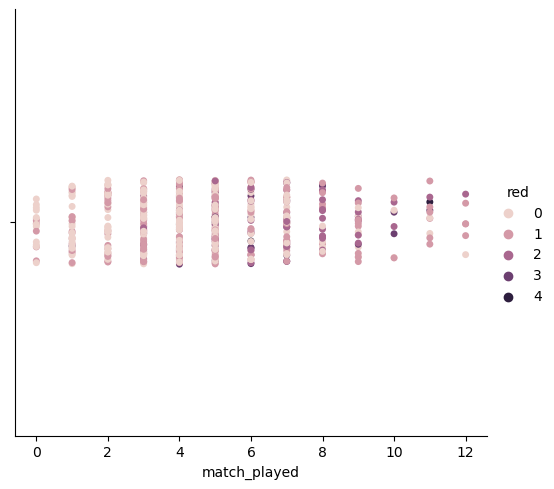

In [41]:
sns.catplot(x="match_played",hue="red",data=df)


**MATCH PLAYED VS YELLOW CARD**

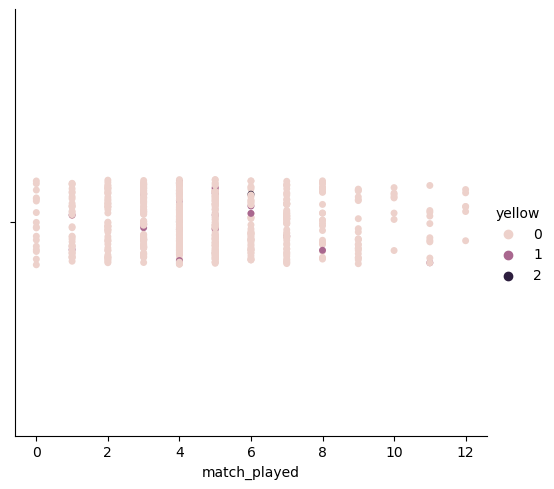

In [42]:
sns.catplot(x="match_played",hue="yellow",data=df)

**MATCHES PLAYED VS DIFFERENT VALUES OF RED CARD**

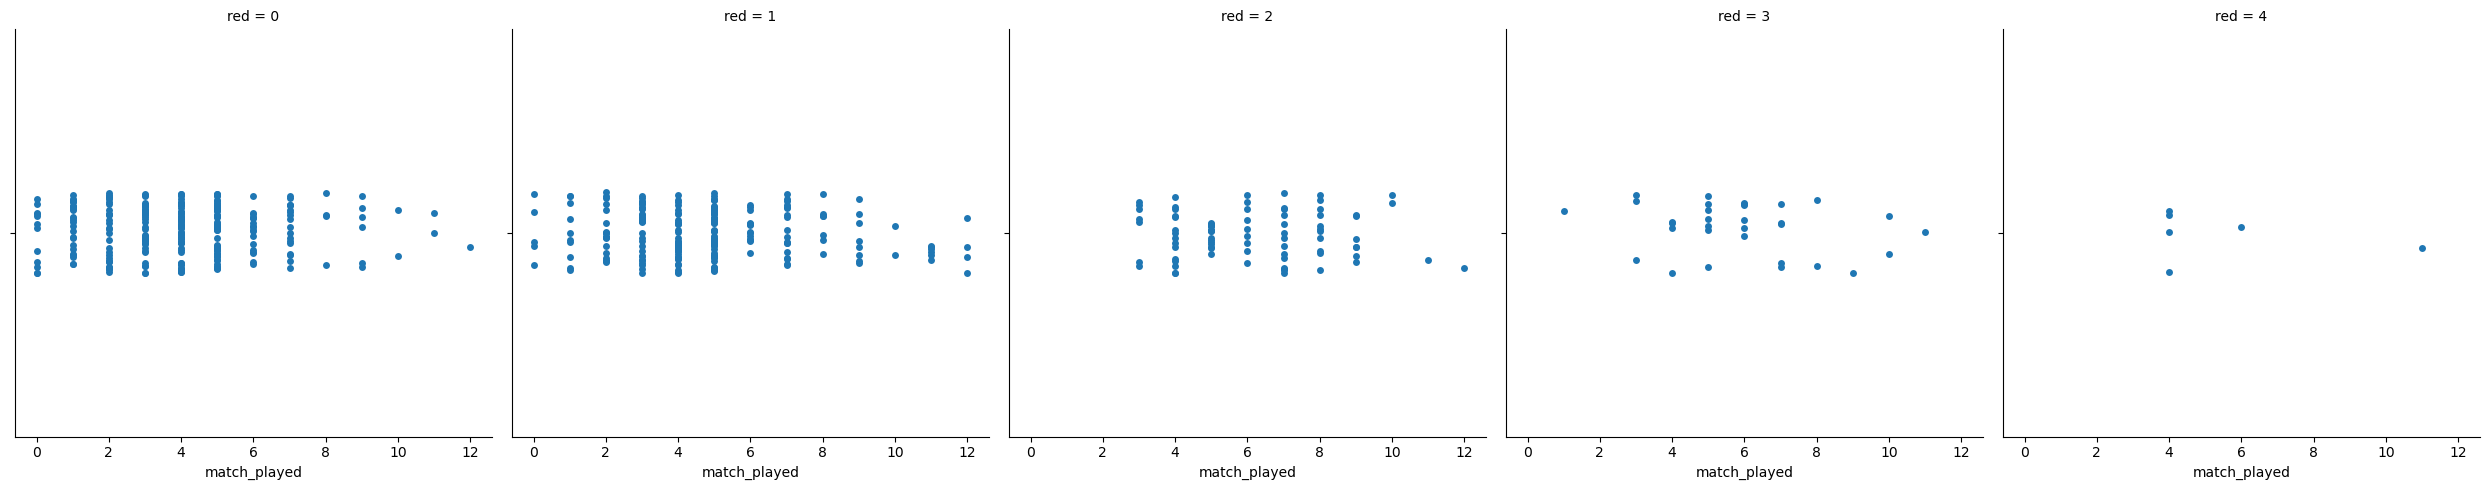

In [43]:
sns.catplot(x="match_played",col="red",data=df)

**MATCHES PLAYED VS DIFFERENT VALUES OF YELLOW CARD**

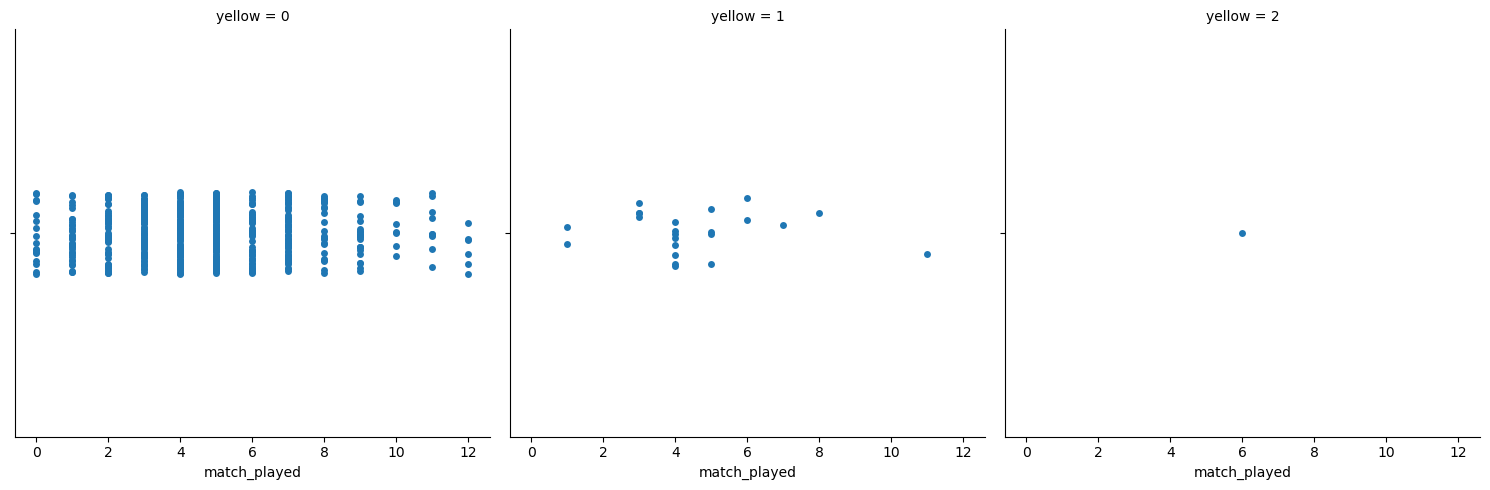

In [44]:
sns.catplot(x="match_played",col="yellow",data=df)

**MATCH PLAYED VS RED VS YELLOW**

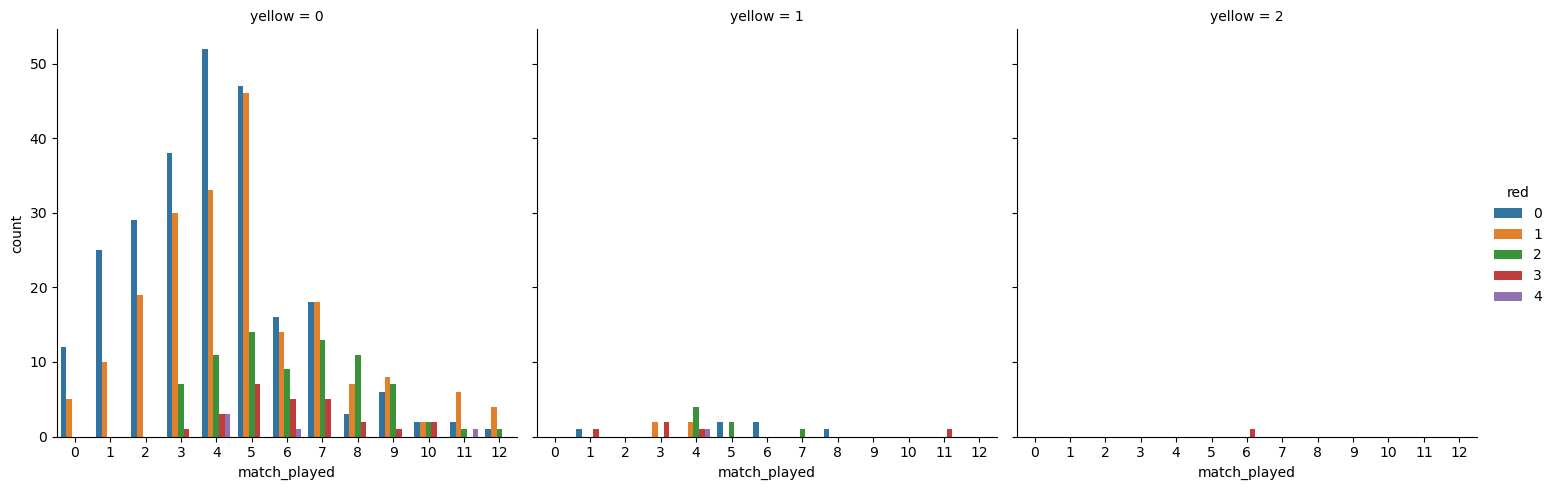

In [45]:
sns.catplot(x="match_played",hue='red' , kind="count", col='yellow', data=df)

**MATCH PLAYED VS YELLOW VS RED**

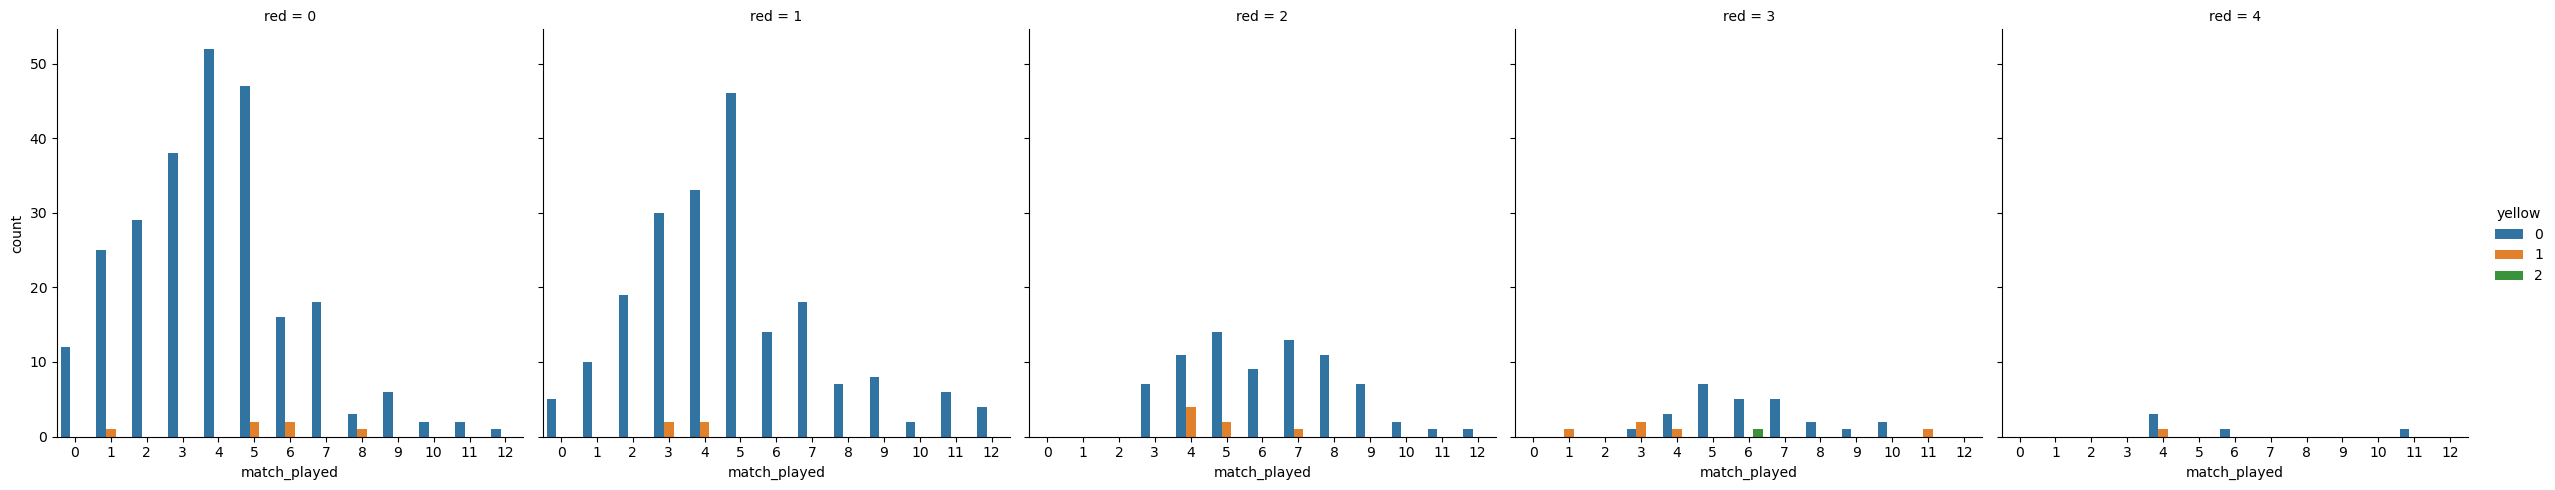

In [46]:
sns.catplot(x="match_played",hue='yellow' , kind="count", col='red', data=df)